In [103]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib.pyplot import figure


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data using pandas from CSV
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load, low_memory=False)
#mouse_drug_data_df.head()
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load, low_memory=False)
clinical_trial_data_df.head()

# Merge two dataframes using an outer join for Tumor Volume Mean
merge_data = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID", how="outer")
merge_data.head()

# Rename merge data for use in Standard Error of Tumor Volumes Grouped by Drug and Timepoint
merge_data_2 = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID", how="outer")
sorted_merge_data = merge_data_2.sort_values(by=['Timepoint'])
sorted_merge_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0
243,z795,Naftisol,0,45.0,0
641,f966,Capomulin,0,45.0,0
1326,m331,Zoniferol,0,45.0,0
646,u364,Capomulin,0,45.0,0


 ## Tumor Response to Treatment

In [104]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_tumor_volume = merge_data.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
mean_tumor_volume.head()
mean_tumor_volume_rename = mean_tumor_volume.rename(columns = {"Tumor Volume (mm3)": "Mean of Tumor Volume (mm3)"})
mean_tumor_volume_rename.head()



,Drug,Timepoint,Mean of Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [105]:
#temp = merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)":["sem","count"]})#.columns

In [106]:
#merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)": sem})

In [107]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

standard_error_tumor_volume = merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)": sem})
standard_error_tumor_volume.head()
standard_error_tumor_volume_rename = standard_error_tumor_volume.rename(columns = {"Tumor Volume (mm3)": "SEM of Tumor Volume (mm3)"})
standard_error_tumor_volume_rename.head()

,Drug,Timepoint,SEM of Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [108]:
#Merge MEAN and SEM dataframes based on drug
mean_sem_merge_df = pd.merge(mean_tumor_volume_rename, standard_error_tumor_volume_rename, on=["Drug", "Timepoint"])
mean_sem_merge_df.head()

,Drug,Timepoint,Mean of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [109]:
#PIVOT TABLE of Mean Tumor Volume
pivot_mean_tumor_volume = mean_tumor_volume_rename.pivot(index='Timepoint', columns="Drug")["Mean of Tumor Volume (mm3)"]
pivot_mean_tumor_volume.head() 



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [110]:
#PIVOT TABLE of Standard Error Tumor Volume
pivot_standard_error_tumor_volume = standard_error_tumor_volume_rename.pivot(index='Timepoint', columns="Drug")["SEM of Tumor Volume (mm3)"]
pivot_standard_error_tumor_volume.head() 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


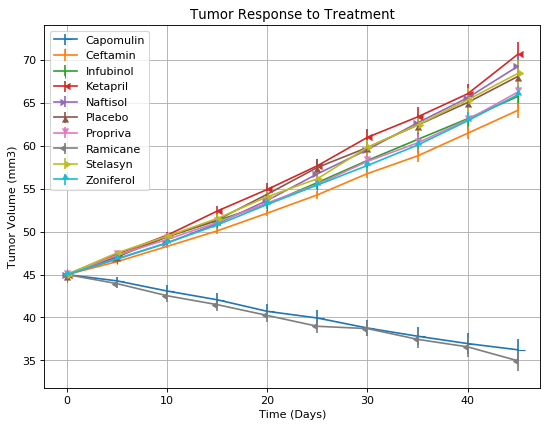

In [111]:
# Generate the Plot (with Error Bars)

marker = 0
label =[]
#THIS WORKS: 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in (pivot_mean_tumor_volume.columns): 
    drug_info = pivot_mean_tumor_volume[i]
    error_bar = pivot_standard_error_tumor_volume[i]
    #print(drug_info)
    x = drug_info.index
    #print(x)
    y = drug_info.values
    #print(y)
    z = error_bar.values
    marker = marker+1
    #print(marker)
    #plt.plot(x,y,marker=marker)
    drug_name = drug_info.name
    #print(drug_name)
    plt.errorbar(x,y,yerr=z, marker=marker)
    #plt.plot(x,y)
    label.append(drug_name)
    #print(label[1])
    #plt.legend(labels=drug_name, loc='upper left',handlelength=1)
    #print(drug_name)
    
 
#plt.legend('Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol')
plt.legend(label)
plt.grid(True)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')

# Save Figure
plt.savefig("TumorResponseToTreatment.png")
plt.show()

#THIS ALSO WORKS:
#labels = mean_sem_merge_df['Drug'].unique().tolist()
#print(labels)
#colors = len(labels)
#print(colors)
#plt.legend(loc='upper left')
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
#mean_sem_merge_df.plot(kind='scatter', x='Timepoint', y='Mean of Tumor Volume (mm3)' )
#plt.show()

## Metastatic Response to Treatment

In [112]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_metastatic_sites = merge_data.groupby(["Drug","Timepoint"], as_index=False)["Metastatic Sites"].mean()
mean_metastatic_sites.head()
mean_metastatic_sites_rename = mean_metastatic_sites.rename(columns = {"Metastatic Sites": "Mean of Metastatic Sites"})
mean_metastatic_sites_rename.head()


,Drug,Timepoint,Mean of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [113]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

standard_error_metastatic_sites = merge_data_2.groupby(["Drug","Timepoint"], as_index=False).agg({"Metastatic Sites": sem})
standard_error_metastatic_sites.head()
standard_error_metastatic_sites_rename = standard_error_metastatic_sites.rename(columns = {"Metastatic Sites": "SEM of Metastatic Sites"})
standard_error_metastatic_sites_rename.head()

,Drug,Timepoint,SEM of Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [114]:
#Merge MEAN and SEM dataframes based on drug
mean_sem_merge_metastatic_df = pd.merge(mean_metastatic_sites_rename, standard_error_metastatic_sites_rename, on=["Drug", "Timepoint"])
mean_sem_merge_metastatic_df.head()

,Drug,Timepoint,Mean of Metastatic Sites,SEM of Metastatic Sites
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [115]:
#PIVOT TABLE of Mean Metastatic Sites
pivot_mean_metastatic_sites = mean_metastatic_sites_rename.pivot(index='Timepoint', columns="Drug")["Mean of Metastatic Sites"]
pivot_mean_metastatic_sites.head() 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [116]:
#PIVOT TABLE of Standard Error Metastatic Sites
pivot_standard_error_metastatic_sites = standard_error_metastatic_sites_rename.pivot(index='Timepoint', columns="Drug")["SEM of Metastatic Sites"]
pivot_standard_error_metastatic_sites.head() 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


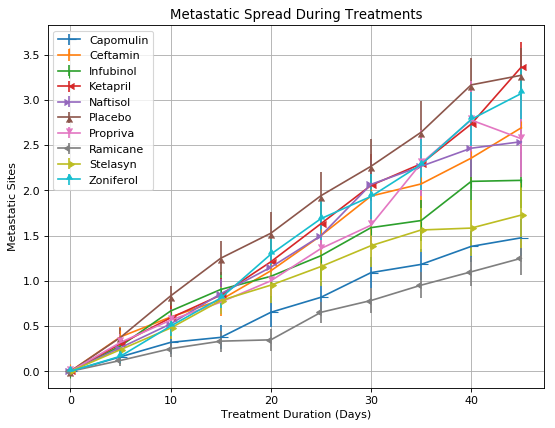

In [117]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

# Generate the Plot (with Error Bars)

marker = 0
label =[]
#THIS WORKS: 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in (pivot_mean_metastatic_sites.columns): 
    drug_info = pivot_mean_metastatic_sites[i]
    error_bar = pivot_standard_error_metastatic_sites[i]
    #print(drug_info)
    x = drug_info.index
    #print(x)
    y = drug_info.values
    #print(y)
    z = error_bar.values
    marker = marker+1
    #print(marker)
    #plt.plot(x,y,marker=marker)
    drug_name = drug_info.name
    label.append(drug_name)
    #print(drug_name)
    plt.errorbar(x,y,yerr=z, marker=marker)
    #plt.legend(labels=drug_name, loc='upper left',handlelength=1)
    #print(drug_name)
    
   
plt.legend(label)
plt.grid(True)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatments')

# Save Figure
plt.savefig("MetastaticSpreadDuringTreatments.png")
plt.show()




## Survival Rates

In [119]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

mouse_count = merge_data.groupby(["Drug","Timepoint"], as_index=False)["Mouse ID"].count()
mouse_count.head()
mouse_count_rename = mouse_count.rename(columns = {"Mouse ID": "Mouse Count"})
mouse_count_rename.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [120]:
#PIVOT TABLE of Mouse Count
pivot_mouse_count = mouse_count_rename.pivot(index='Timepoint', columns="Drug")["Mouse Count"]
pivot_mouse_count.head() 


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [121]:
#print(pivot_mouse_count.index.name)
#print(pivot_mouse_count.index.values)
#print(pivot_mouse_count.index.values[2])
#print(pivot_mouse_count.columns)
#print(pivot_mouse_count.columns.name)
#print(pivot_mouse_count.columns.values)
#print(pivot_mouse_count.columns.values[2])
#print(pivot_mouse_count["Capomulin"])

#print(pivot_mouse_count.index[0])

drug_column_list=[]

for x in pivot_mouse_count.columns:
    drug_column_list.append(x)

#print(drug_column_list)

survival_dict = {}
index = []
time_point = []
survival_rate = []
drug_name = []
time_iterator = 0

for j in drug_column_list:
    #print(j)
    current_drug = j
    #print(current_drug)
    
    for i in range(len(pivot_mouse_count.index.values)):
        print(current_drug)
        #print(i)
        event_at_0 = pivot_mouse_count.loc[pivot_mouse_count.index[0],
                                pivot_mouse_count.columns[current_drug]
            
        #event_at_0 = pivot_mouse_count.loc[pivot_mouse_count.index.values[i], pivot_mouse_count.columns[current_drug]
        #current_event = pivot_mouse_count.loc[pivot_mouse_count.index.values[2], 
        
                                           #pivot_mouse_count[current_drug]]
        print(event_at_0)
        #print(pivot_mouse_count.index.values[2])
        #print(pivot_mouse_count.columns[current_drug])
        #print(current_event)
        #time_iterator = time_iterator+1
        
        #survival_rate_at_time_point = ((current_event)/(event_at_0))*100
        
        #print(i)
        #print(survival_rate_at_time_point)
        #print(pivot_mouse_count.columns.values[0])

        #time_point.append(i)
        #survival_rate.append(survival_rate_at_time_point)
        #drug_name.append(pivot_mouse_count.columns.values[0])

    #print(time_point)  
    #print(survival_rate)
    #print(drug_name)

    #current_drug_list = pd.DataFrame(
        #{'Time Point': time_point,
         #'Drug': drug_name,
         #'Survival Rate': survival_rate,
        #})
#current_drug_list.head()

#survival_dict = survival_dict(zip(time_point, survival_rate))
#print(survival_dict)

# get the values for time = 0 from the survival table
#event_at_0 = pivot_mouse_count.iloc[0, :]
# now calculate the survival probability for t = 0
#surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
#surv_for_0

#http://savvastjortjoglou.com/nfl-survival-analysis-kaplan-meier.html

SyntaxError: invalid syntax (<ipython-input-121-2e675f63be93>, line 41)

In [122]:
#for idx, row in df.iterrows():
     #print((idx, row.Name))

for index, row in pivot_mouse_count.iterrows():
    print((index, row.name))

array_index = 0
for index, column in pivot_mouse_count.iteritems():
    #print((index, column.name, column.values))
    print((index, column.name, column.values[array_index]))
    array_index = array_index + 1     

(0, 0)
(5, 5)
(10, 10)
(15, 15)
(20, 20)
(25, 25)
(30, 30)
(35, 35)
(40, 40)
(45, 45)
('Capomulin', 'Capomulin', 25)
('Ceftamin', 'Ceftamin', 21)
('Infubinol', 'Infubinol', 21)
('Ketapril', 'Ketapril', 19)
('Naftisol', 'Naftisol', 20)
('Placebo', 'Placebo', 17)
('Propriva', 'Propriva', 13)
('Ramicane', 'Ramicane', 21)
('Stelasyn', 'Stelasyn', 12)
('Zoniferol', 'Zoniferol', 14)


In [166]:
#WORKING ON THIS

index = []
time_point = []
survival_rate = []
drug_name = []
row_iterator = 0
dn = []

df = pd.DataFrame(columns=["Time Point", "Survival Rate"])
df.head()
for index, column in pivot_mouse_count.iteritems():
    current_drug_name = index
    #print(index)
    drug_name.append(index)
    event_at_0 = column.values[0]
    #print(event_at_0)
    for index, row in pivot_mouse_count.iterrows():
        #print((index, row.name, row.values[row_iterator]))
        current_event = row.values[row_iterator]
        survival_rate_at_time_point = ((current_event)/(event_at_0))*100
        survival_rate.append(survival_rate_at_time_point)  
        time_point.append(index)
    #print(time_point)
        
    row_iterator = row_iterator+1
    #print(survival_rate) 
    current_drug_list = pd.DataFrame(
        {'Time Point': time_point,
         current_drug_name + ' Survival Rate': survival_rate,
        }).set_index("Time Point")
    current_drug_list.head()
    dn.append(current_drug_list)
    survival_rate = []
    time_point = []

#print(drug_name)
dn = pd.concat(dn, axis=1) 
dn.head()


#https://stackoverflow.com/questions/28910089/filling-empty-python-dataframe-using-loops
        
    
    

,Capomulin Survival Rate,Ceftamin Survival Rate,Infubinol Survival Rate,Ketapril Survival Rate,Naftisol Survival Rate,Placebo Survival Rate,Propriva Survival Rate,Ramicane Survival Rate,Stelasyn Survival Rate,Zoniferol Survival Rate
Time Point,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


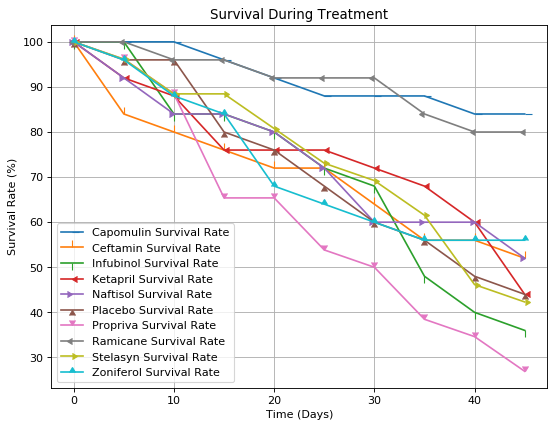

In [168]:
# Generate the Plot (with Error Bars)

marker = 0
label =[]
#THIS WORKS: 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in (dn.columns): 
    drug_info = dn[i]
    
    #print(drug_info)
    x = drug_info.index
    #print(x)
    y = drug_info.values
    #print(y)
    
    marker = marker+1
    #print(marker)
    plt.plot(x,y,marker=marker)
    drug_name = drug_info.name
    label.append(drug_name)
    #print(drug_name)
    #plt.errorbar(x,y,yerr=z, marker=marker)
    #plt.legend(labels=drug_name, loc='upper left',handlelength=1)
    #print(drug_name)
    
   
plt.legend(label)
plt.grid(True)
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')

# Save Figure
plt.savefig("SurvivalDuringTreatment.png")
plt.show()

In [124]:
survival_dict = {}
index = []
time_point = []
survival_rate = []
drug_name = []
row_iterator = 0

for index, row in pivot_mouse_count.iterrows():
    #print((index, row.name, row.values[row_iterator]))
    #print(row.values[row_iterator])
    event_at_0 = row.values[0]
    current_event = row.values[row_iterator]
    survival_rate_at_time_point = ((current_event)/(event_at_0))*100
    #time_point.append(index)
    survival_rate.append(survival_rate_at_time_point)
    #drug_name.append(pivot_mouse_count.columns.values[0])
row_iterator = row_iterator+1
   
print(survival_rate)    
#row_iterator = row_iterator+1
#print(row_iterator)
        
#survival_rate_at_time_point = ((current_event)/(event_at_0))*100
        

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [125]:
survival_dict = {}
index = []
time_point = []
survival_rate = []
drug_name = []
row_iterator = 0
for index, column in pivot_mouse_count.iteritems():
    print(index)
    event_at_0 = column.values[0]
    print(event_at_0)
    current_event = row.values[row_iterator]
    print(current_event)
    #survival_rate_at_time_point = ((current_event)/(event_at_0))*100
    #time_point.append(index)
    #survival_rate.append(survival_rate_at_time_point)
    #drug_name.append(pivot_mouse_count.columns.values[0])
row_iterator = row_iterator+1
   
#print(survival_rate)    

Capomulin
25
21
Ceftamin
25
21
Infubinol
25
21
Ketapril
25
21
Naftisol
25
21
Placebo
25
21
Propriva
26
21
Ramicane
25
21
Stelasyn
26
21
Zoniferol
25
21


In [126]:
#DO NOT EDIT
survival_dict = {}
index = []
time_point = []
survival_rate = []
drug_name = []
time_iterator = 0

for i in pivot_mouse_count.index.values:
    #print(i)
    event_at_0 = pivot_mouse_count.loc[pivot_mouse_count.index[0],pivot_mouse_count.columns[0]]
    #print(pivot_mouse_count.index[0])
    #print(pivot_mouse_count.columns[0])
    #print(event_at_0)
    
    current_event = pivot_mouse_count.loc[pivot_mouse_count.index.values[time_iterator],pivot_mouse_count.columns[0]]
    #print(pivot_mouse_count.index.values[time_iterator])
    #print(pivot_mouse_count.columns[0])
    #print(current_event)
    time_iterator = time_iterator+1
        
    survival_rate_at_time_point = ((current_event)/(event_at_0))*100
        
    #print(i)
    #print(survival_rate_at_time_point)
    #print(pivot_mouse_count.columns.values[0])

    time_point.append(i)
    survival_rate.append(survival_rate_at_time_point)
    drug_name.append(pivot_mouse_count.columns.values[0])

    #print(time_point)  
    #print(survival_rate)
    #print(drug_name)

    current_drug_list = pd.DataFrame(
        {'Time Point': time_point,
         'Drug': drug_name,
         'Survival Rate': survival_rate,
        })
current_drug_list.head()

,Time Point,Drug,Survival Rate
0,0,Capomulin,100.0
1,5,Capomulin,100.0
2,10,Capomulin,100.0
3,15,Capomulin,96.0
4,20,Capomulin,92.0


In [127]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

